In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.relu import ReLu
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
from nnlib.activation_functions.softmax import Softmax
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.loss_functions.mse import MeanSquaredError
from nnlib.loss_functions.cce import CategoricalCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


c:\Programs\Anaconda3\envs\ivc\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:

# Convert labels to integers
X = np.array(X).astype(np.float32)
X = X/255.0
y = np.array(y).astype(np.uint8).reshape(-1, 1)
# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.4, random_state=42)

# Split the temporary set equally into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

c:\Programs\Anaconda3\envs\ivc\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20 - loss: 1.6541 - val_loss: 0.8992
Epoch 2/20 - loss: 0.6143 - val_loss: 0.4566
Epoch 3/20 - loss: 0.3909 - val_loss: 0.3515
Epoch 4/20 - loss: 0.3169 - val_loss: 0.3025
Epoch 5/20 - loss: 0.2769 - val_loss: 0.2731
Epoch 6/20 - loss: 0.2505 - val_loss: 0.2528
Epoch 7/20 - loss: 0.2310 - val_loss: 0.2373
Epoch 8/20 - loss: 0.2155 - val_loss: 0.2245
Epoch 9/20 - loss: 0.2023 - val_loss: 0.2138
Epoch 10/20 - loss: 0.1910 - val_loss: 0.2046
Epoch 11/20 - loss: 0.1811 - val_loss: 0.1966
Epoch 12/20 - loss: 0.1723 - val_loss: 0.1894
Epoch 13/20 - loss: 0.1645 - val_loss: 0.1831
Epoch 14/20 - loss: 0.1574 - val_loss: 0.1775
Epoch 15/20 - loss: 0.1510 - val_loss: 0.1724
Epoch 16/20 - loss: 0.1451 - val_loss: 0.1678
Epoch 17/20 - loss: 0.1396 - val_loss: 0.1635
Epoch 18/20 - loss: 0.1345 - val_loss: 0.1596
Epoch 19/20 - loss: 0.1298 - val_loss: 0.1560
Epoch 20/20 - loss: 0.1254 - val_loss: 0.1527


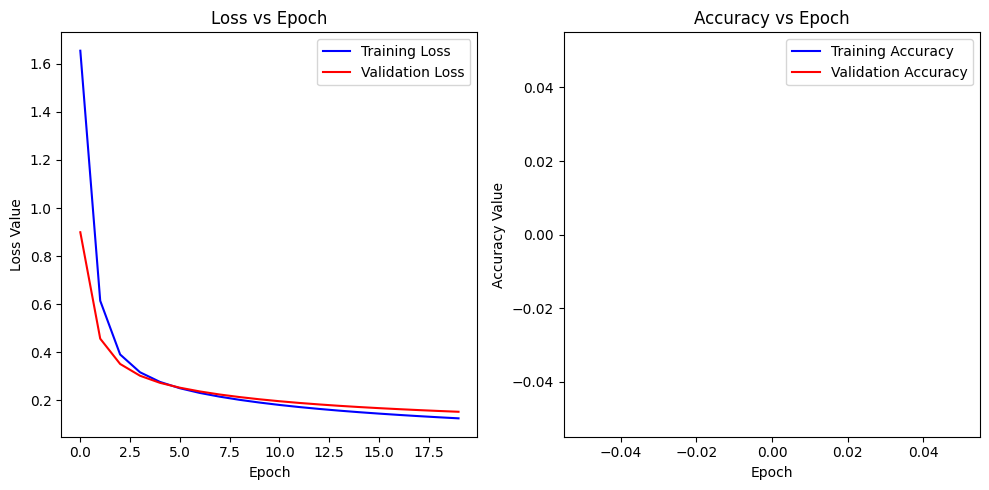

In [ ]:

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=ReLu()))
model.add(Dense(n_units= 128, input_dim=128, activation=ReLu()))
model.add(Dense(n_units = 10, input_dim = 128, activation=Softmax()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001, dropout=0.0),
              loss=CategoricalCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train, epochs=20, batch_size=512, X_val=X_test, y_val=y_test, verbose=True, plot_histograms=False)

In [ ]:
model.predict(X_test)

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), verbose=1)
model.evaluate(X_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()